In [1]:
import json
import importlib
import sys
import base64

from pathlib import Path
from typing import Any
from PIL import Image
from IPython.display import HTML

modelslib_path = '../'
if modelslib_path not in sys.path:
    sys.path.append(modelslib_path)

models_dir = 'models'
models = importlib.import_module(models_dir)

from models import Item

In [2]:
items_path = 'C:/Users/PC-SAMUEL/Desktop/Coding/python/grounded_crawler/data/crawled/1.4.1.4512/items.json'
items_json: dict[str, Any] = json.loads(Path(items_path).read_text())
items: dict[str, Item] = {}
for key, value in items_json.items():
    items[key] = Item.from_dict(value)

In [3]:
material_resources: dict[str, Item] = {}
for item in items.values():
    if 'ResourcesAndMaterials.Intermediate' not in item.ugc_tag:
        continue

    material_resources[item.name.text] = item
material_resources = dict(sorted(material_resources.items()))

creature_resources: dict[str, Item] = {}
for item in items.values():
    if 'ResourcesAndMaterials.Creature' not in item.ugc_tag:
        continue

    creature_resources[item.name.text] = item
creature_resources = dict(sorted(creature_resources.items()))

natural_resources: dict[str, Item] = {}
for item in items.values():
    if 'ResourcesAndMaterials.Natural' not in item.ugc_tag:
        continue

    natural_resources[item.name.text] = item
natural_resources = dict(sorted(natural_resources.items()))

tools: dict[str, Item] = {}
for item in items.values():
    if 'Category.ActorPlacement.Equippables' not in item.ugc_tag:
        continue
    elif any([x in item.ugc_tag for x in ['Body', 'Head', 'Legs', 'Trinkets']]):
        continue

    tools[item.name.text] = item
tools = dict(sorted(tools.items()))

armors: dict[str, Item] = {}
for item in items.values():
    if item.icon_modifier_path.as_posix().endswith('T_UI_PetWearable.png'):
        # Add Pet Armors to the armors dict
        armors[item.name.text] = item
        continue
    elif 'Category.ActorPlacement.Equippables' not in item.ugc_tag:
        continue
    elif any([x in item.ugc_tag for x in ['Melee', 'Offhand', 'Ranged', 'Trinkets']]):
        continue

    armors[item.name.text] = item
armors = dict(sorted(armors.items()))

trinkets: dict[str, Item] = {}
for item in items.values():
    if 'Category.ActorPlacement.Equippables' not in item.ugc_tag:
        continue
    elif 'Trinkets' not in item.ugc_tag:
        continue

    trinkets[item.name.text] = item
trinkets = dict(sorted(trinkets.items()))

foods: dict[str, Item] = {}
for item in items.values():
    if 'Consumables.Smoothies' in item.ugc_tag:
        continue
    elif item.stack_size_tag == 'StackSize.Single':
        # Check for specific conditions for the item to be considered a food
        for consumable_data in item.consumable_data:
            if consumable_data['RowName'] in ['FoodTiny', 'MealTier0', 'WaterTiny']:
                foods[item.name.text] = item
                break
        continue
    elif item.stack_size_tag != 'StackSize.Food':
        continue

    foods[item.name.text] = item
foods = dict(sorted(foods.items()))

meals: dict[str, Item] = {}
for item in items.values():
    if 'Consumables.Meals' not in item.ugc_tag:
        continue

    meals[item.name.text] = item
meals = dict(sorted(meals.items()))

smoothies: dict[str, Item] = {}
for item in items.values():
    if 'Consumables.Smoothies' not in item.ugc_tag and item.consume_animation_type != 'EInteractAnimType::DrinkItemProp':
        continue

    smoothies[item.name.text] = item
smoothies = dict(sorted(smoothies.items()))

key_items: dict[str, Item] = {}
for item in items.values():
    if 'ResourcesAndMaterials.KeyItem' not in item.ugc_tag and 'BossKey' not in item.key_name:
        continue

    key_items[item.name.text] = item
key_items = dict(sorted(key_items.items()))

all_categories: list[Item] = [
    *material_resources.values(),
    *creature_resources.values(),
    *natural_resources.values(),
    *tools.values(),
    *armors.values(),
    *trinkets.values(),
    *foods.values(),
    *meals.values(),
    *smoothies.values(),
    *key_items.values()
]

In [4]:
duplication_cost_template = '[[File:Raw Science.png|25px|link=Raw Science]] {{#switch:{{{1}}}\n'
duplication_cost_template += '|#default = N/A\n\n'

duplication_cost_template += '<!-- Material Resources -->\n'
for item in material_resources.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Creature Resources -->\n'
for item in creature_resources.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Natural Resources -->\n'
for item in natural_resources.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Tools -->\n'
for item in tools.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Armor -->\n'
for item in armors.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Trinkets -->\n'
for item in trinkets.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Foods -->\n'
for item in foods.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Meals -->\n'
for item in meals.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Smoothies -->\n'
for item in smoothies.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '<!-- Key Items -->\n'
for item in key_items.values():
    duplication_cost_template += f'|{item.name.text} = {item.duplication_cost:,}\n'
duplication_cost_template += '\n'

duplication_cost_template += '}}'

In [5]:
with open('duplication_cost_template.txt', 'w', encoding='utf-8') as f:
    f.write(duplication_cost_template)

In [6]:
not_founds: list[Item] = []
for _item in items.values():
    found = False
    for item in all_categories:
        if item.name.text == _item.name.text:
            found = True
            break

    if not found:
        not_founds.append(_item)

In [27]:
max_columns = 6
columns = 0

html_table = '<table style="margin-left: auto; margin-right: auto; border-collapse: collapse; border: 1px solid black;">\n'
html_table += '<tr style="text-align: center; border: 1px solid black;">\n'
for item in not_founds:
    icon_image = None
    if item.icon_path.exists() and item.icon_path.is_file():
        icon_image = Image.open(item.icon_path, 'r').convert('RGBA')
        icon_image = icon_image.resize((128, 128))
    base64_icon = ''
    if icon_image is not None:
        with open(item.icon_path, 'rb') as f:
            base64_icon = base64.b64encode(f.read()).decode('utf-8')

    html_table += f'<td><img src="data:image/png;base64,{base64_icon}" width="128"><br>{item.name.text}<br>{item.key_name}<br>{item.duplication_cost}</td>\n'
    columns += 1
    if columns >= max_columns:
        columns = 0
        html_table += '</tr>\n<tr style="text-align: center; border: 1px solid black;">\n'

html_table += '</table>'

full_html = '<!DOCTYPE html>\n'
full_html += '<html>\n'
full_html += '<head>\n'
full_html += '<style>\n'
full_html += '@font-face {\n'
full_html += '    font-family: "Gin";\n'
full_html += '    src: url("https://github.com/samjviana/grounded_crawler/raw/main/Gin.ttf");\n'
full_html += '}\n'
full_html += 'body {\n'
full_html += '    font-family: "Gin";\n'
full_html += '}\n'
full_html += 'table {\n'
full_html += '    margin-left: auto;\n'
full_html += '    margin-right: auto;\n'
full_html += '    border-collapse: collapse;\n'
full_html += '    border: 1px solid black;\n'
full_html += '}\n'
full_html += 'td {\n'
full_html += '    text-align: center;\n'
full_html += '    border: 1px solid black;\n'
full_html += '}\n'
full_html += '</style>\n'
full_html += '</head>\n'
full_html += '<body>\n'
full_html += html_table
full_html += '</body>\n'
full_html += '</html>'



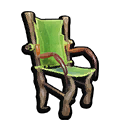
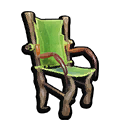
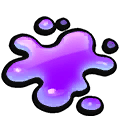
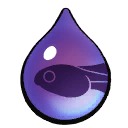
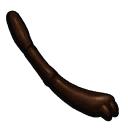
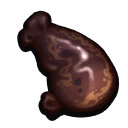
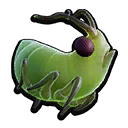
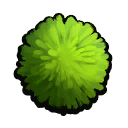
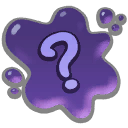
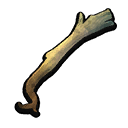
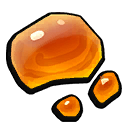
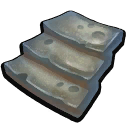
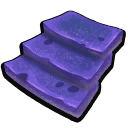
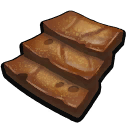
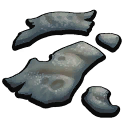
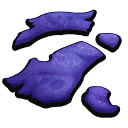
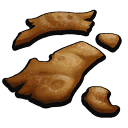
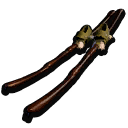
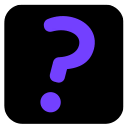
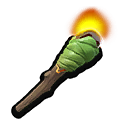
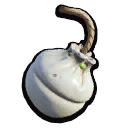
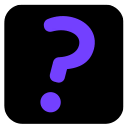
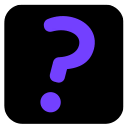
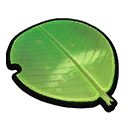
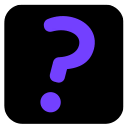
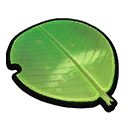
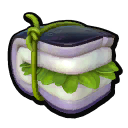
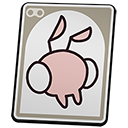
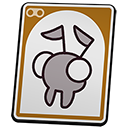
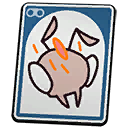
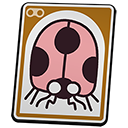
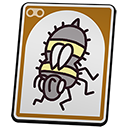
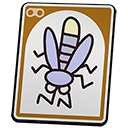
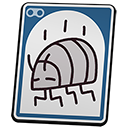
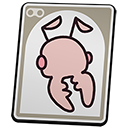
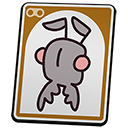
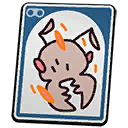
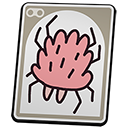
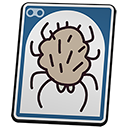
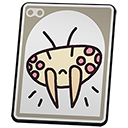
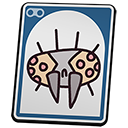
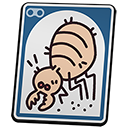
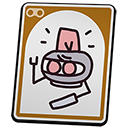
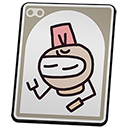
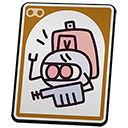
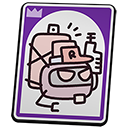
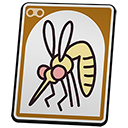
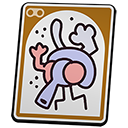
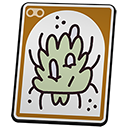
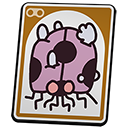
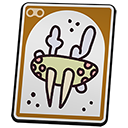
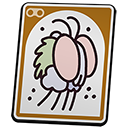
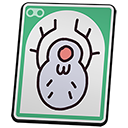
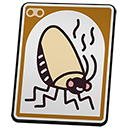
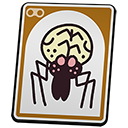
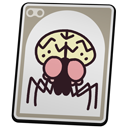
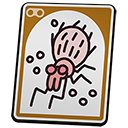
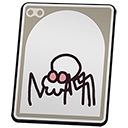
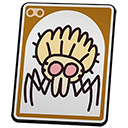
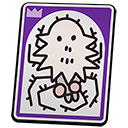
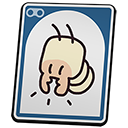
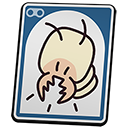
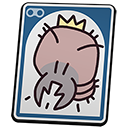
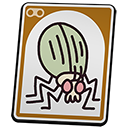
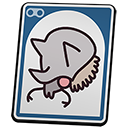
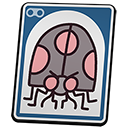
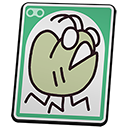
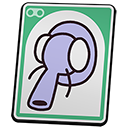
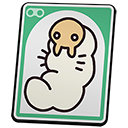
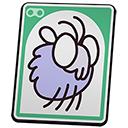
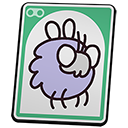
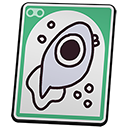
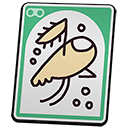
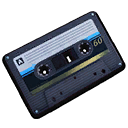
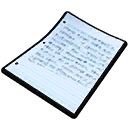
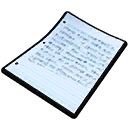
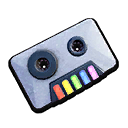
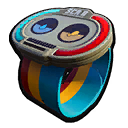
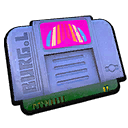
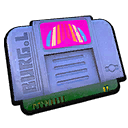
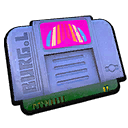
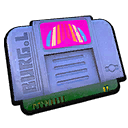
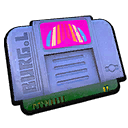
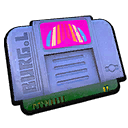
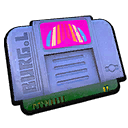
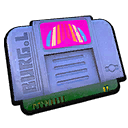
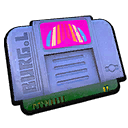
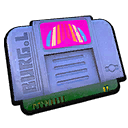
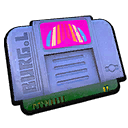
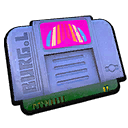
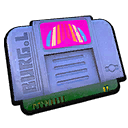
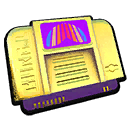
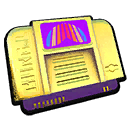
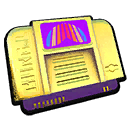
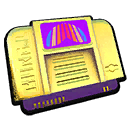
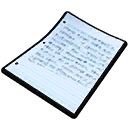
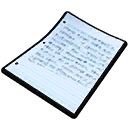
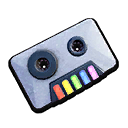
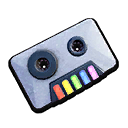
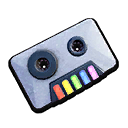
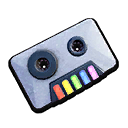
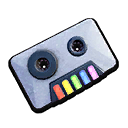
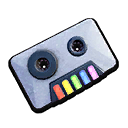
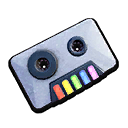
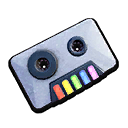
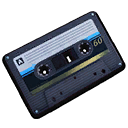
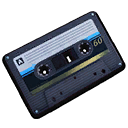
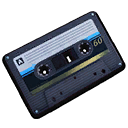
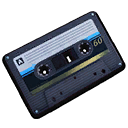
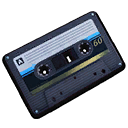
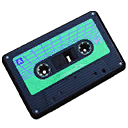
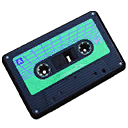
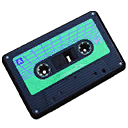
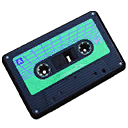
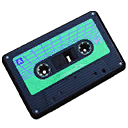
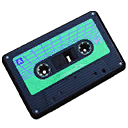
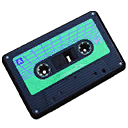
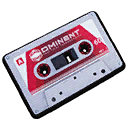
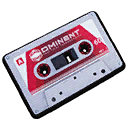
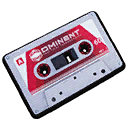
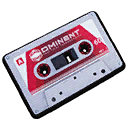
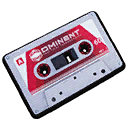
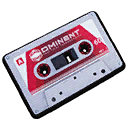
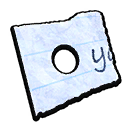
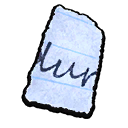
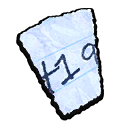
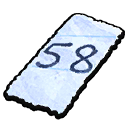
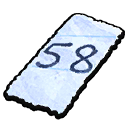
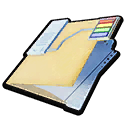
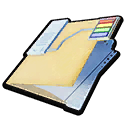
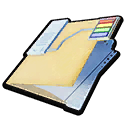
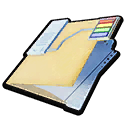
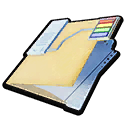
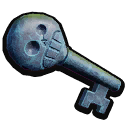
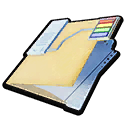
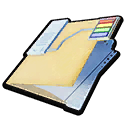
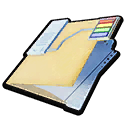
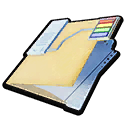
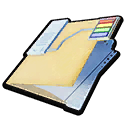
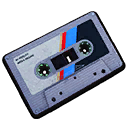
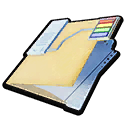
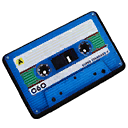
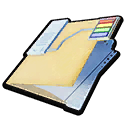
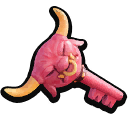
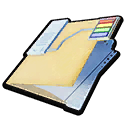
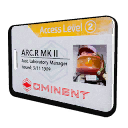
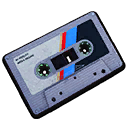
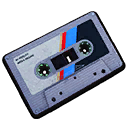
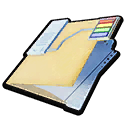
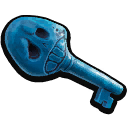
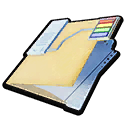
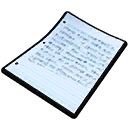
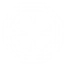
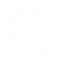
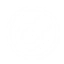
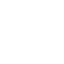
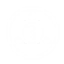
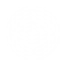
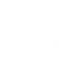
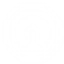
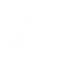
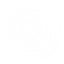
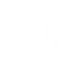
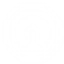
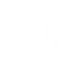
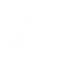
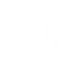
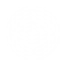
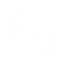
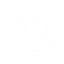
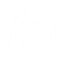
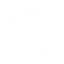
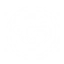
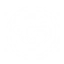
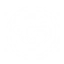
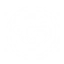
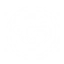
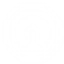
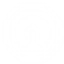
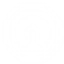
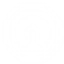
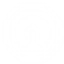
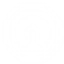
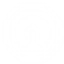
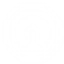
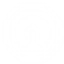
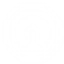
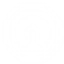
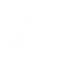
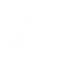
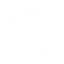
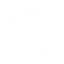
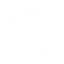
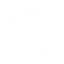
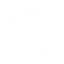
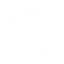
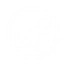
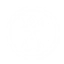
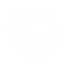
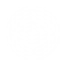
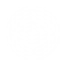
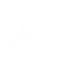
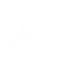
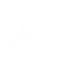
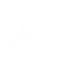
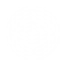
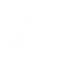
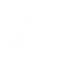
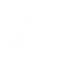
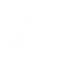
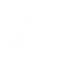
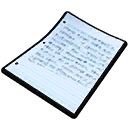
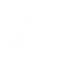
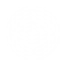
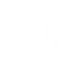
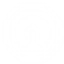
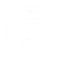
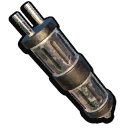
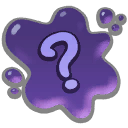
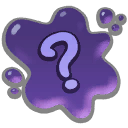
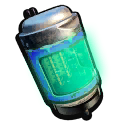
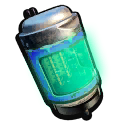
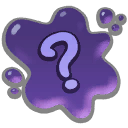
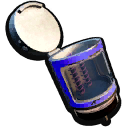
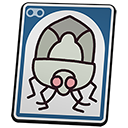
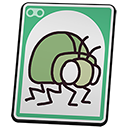
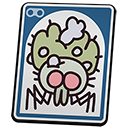
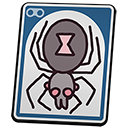
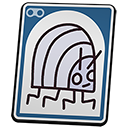
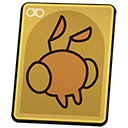
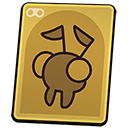
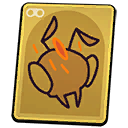
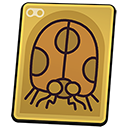
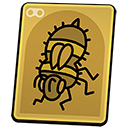
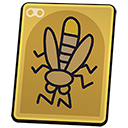
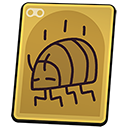
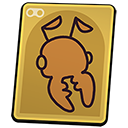
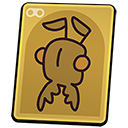
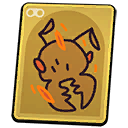
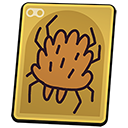
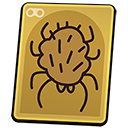
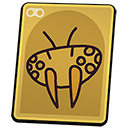
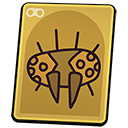
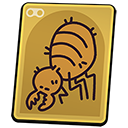
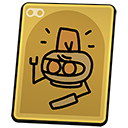
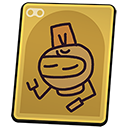
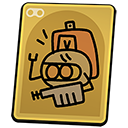
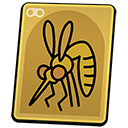
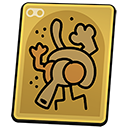
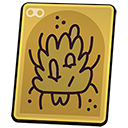
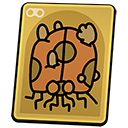
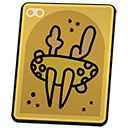
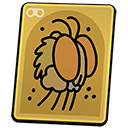
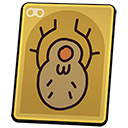
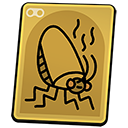
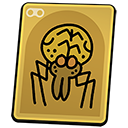
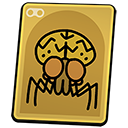
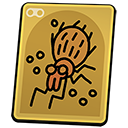
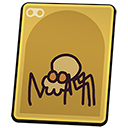
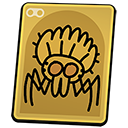
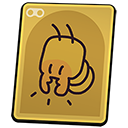
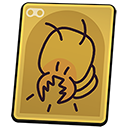
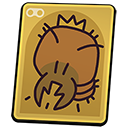
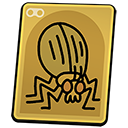
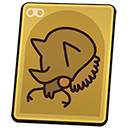
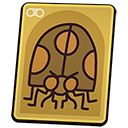
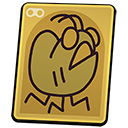
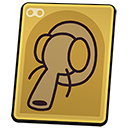
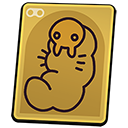
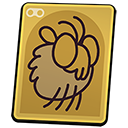
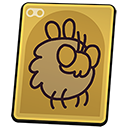
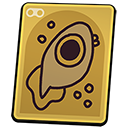
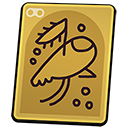
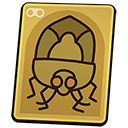
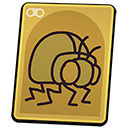
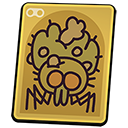
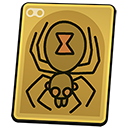
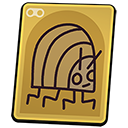
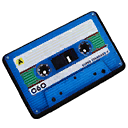
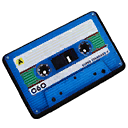
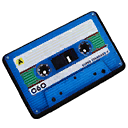
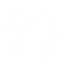
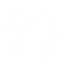
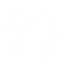
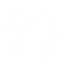
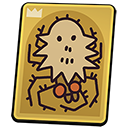
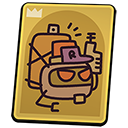
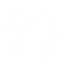
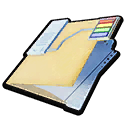
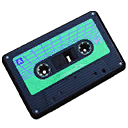
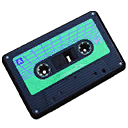
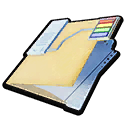
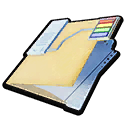
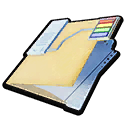
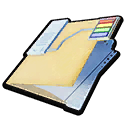
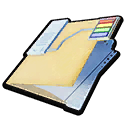
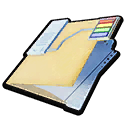
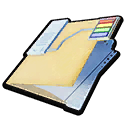
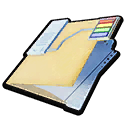
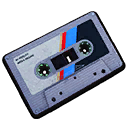
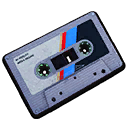
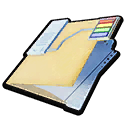
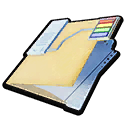
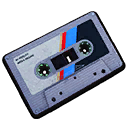
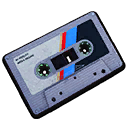
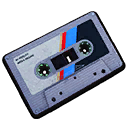
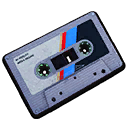
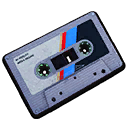
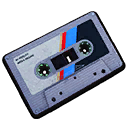
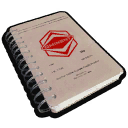
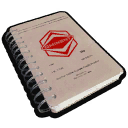
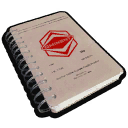
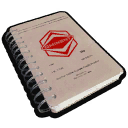
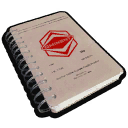
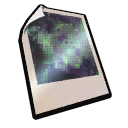
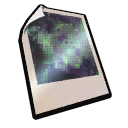
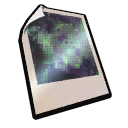
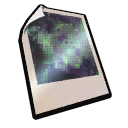
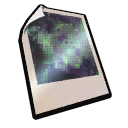
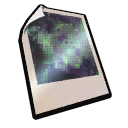
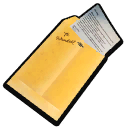
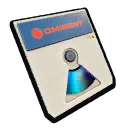
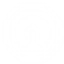
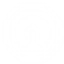
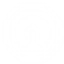
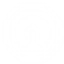
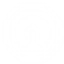
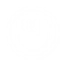
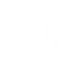
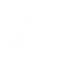
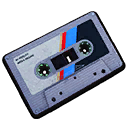
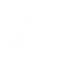
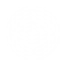
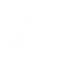
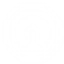
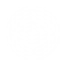
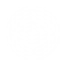
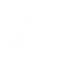
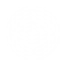
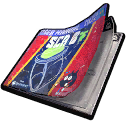
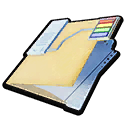
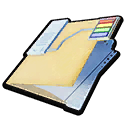
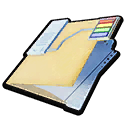
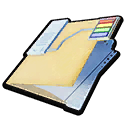
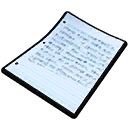
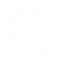
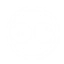
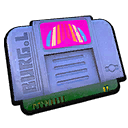
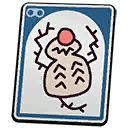
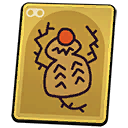
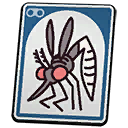
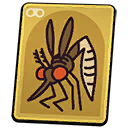
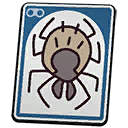
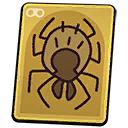
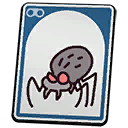
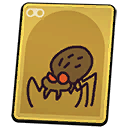
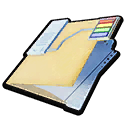
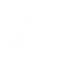
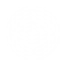
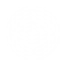
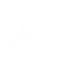
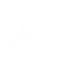
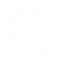
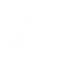
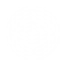
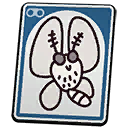
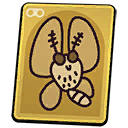
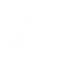
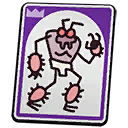
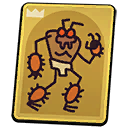
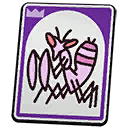
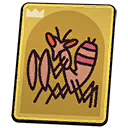
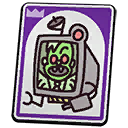
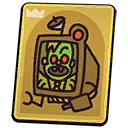
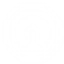
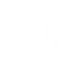
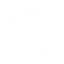
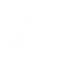
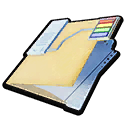
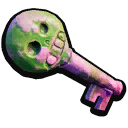
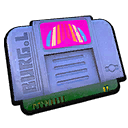
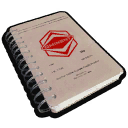
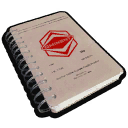
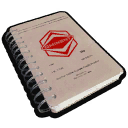
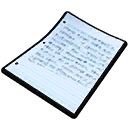
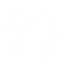
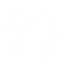
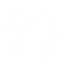
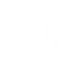
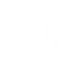
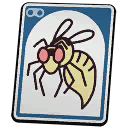
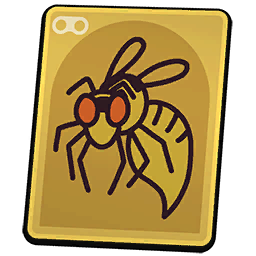
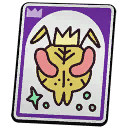
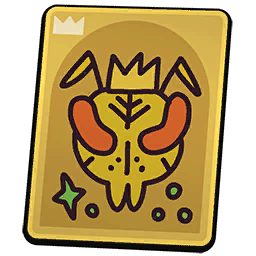
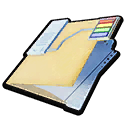
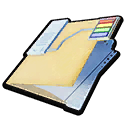
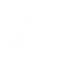
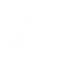
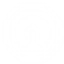
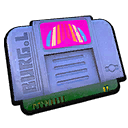
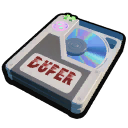
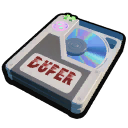
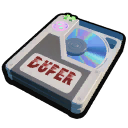
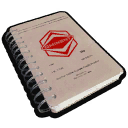
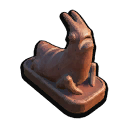
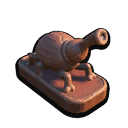
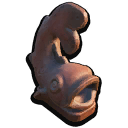
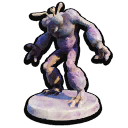
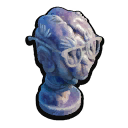
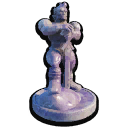
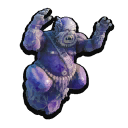
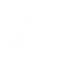
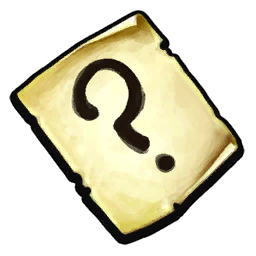
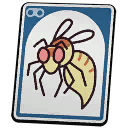
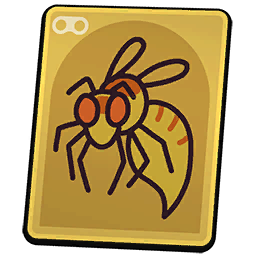
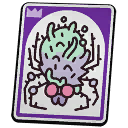
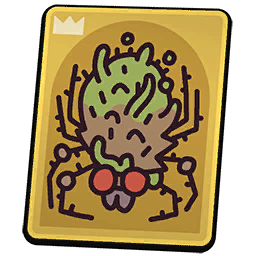
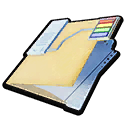
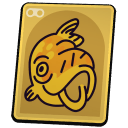
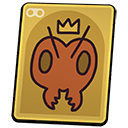
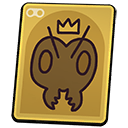
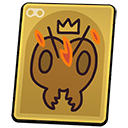
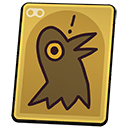
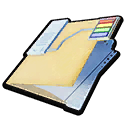
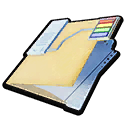
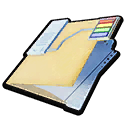
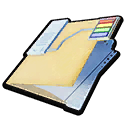
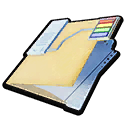
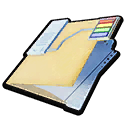
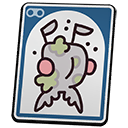
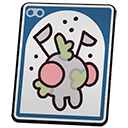
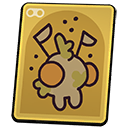
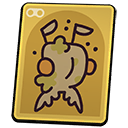
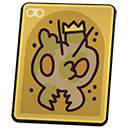
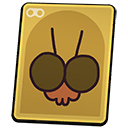
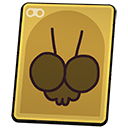
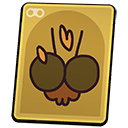
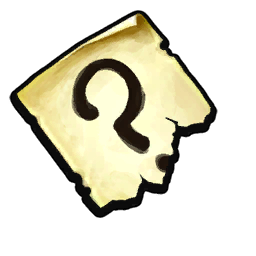
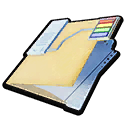
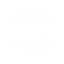
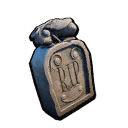
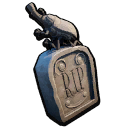
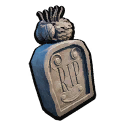
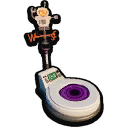
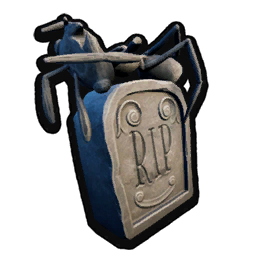

In [28]:
with open('not_founds.html', 'w', encoding='utf-8') as f:
    f.write(full_html)
display(HTML(full_html))